# Overview Figure of Methow and Tuolumne Watersheds

In [29]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.basemap import Basemap
import rioxarray as rxr
import rasterio as rio

In [2]:
%matplotlib inline

In [3]:
!pwd

/Users/Hannah/Documents/Documents_Grad/Research/IDS_westernUS/SlideRule_tuolumne/notebooks


In [7]:
tuol_outline = gpd.read_file('../../data/site_outlines/UpperTuolRiverBasinOutline.geojson')
met_outline = gpd.read_file('../../data/site_outlines/methow_outline.geojson')
gm_outline = gpd.read_file('../../data/site_outlines/gm_outline.geojson')
states = gpd.read_file('../../data/site_outlines/state_bounds/state_bounds.shp')

In [8]:
tuol_outline = tuol_outline[0:1]

In [7]:
tuol_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

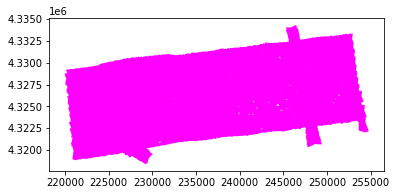

In [13]:
gm_outline.plot(facecolor='magenta')

In [14]:
gm_outline.crs

<Projected CRS: EPSG:32613>
Name: WGS 84 / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 108°W and 102°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-108.0, 0.0, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
met_outline.drop([0,1,2])

,fn,date,geometry
3,./datasetsA/methow_basin_2018/dtm/raw/methow_b...,2018,"POLYGON ((-120.33042 48.80903, -120.33042 48.8..."


In [9]:
met_outline.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
tuol_outline.to_crs('epsg:32611').area / 1e6

0    1181.214
dtype: float64

In [20]:
met_outline.to_crs('epsg:32610').area / 1e6

0    1.655314e-06
1    8.290758e-07
2    8.314041e-07
3    1.792769e+03
dtype: float64

AttributeError: 'PatchCollection' object has no property 'edgewidth'

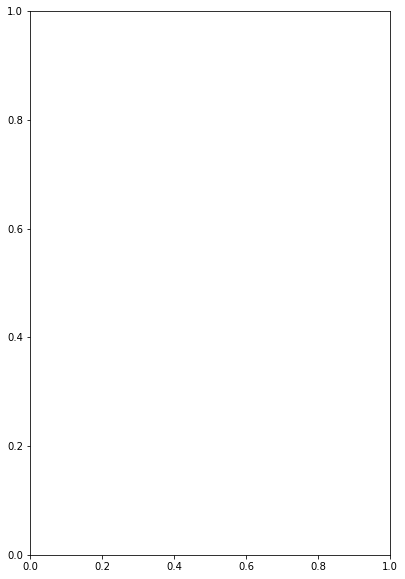

In [17]:
basemap = cx.providers.Stamen.TerrainBackground
extent = ([-125, 37, -105, 50])

f, axa = plt.subplots(figsize=(10,10))

met_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
tuol_outline.plot(ax=axa, facecolor='magenta', edgecolor='k')
gm_outline.to_crs('epsg:4326').plot(ax=axa, facecolor='magenta', edgecolor='k')
states.plot(ax=axa, edgecolor='gray')

axa.set_xlim(extent[0], extent[2])
axa.set_ylim(extent[1], extent[3])
cx.add_basemap(axa, attribution=False, crs='epsg:4326', source=basemap, zoom=9)
plt.xticks(rotation=45)
axa.set_xlabel('Longitude')
axa.set_ylabel('Latitude')
plt.tight_layout()
plt.savefig('../figures/sites_map.jpeg',dpi=500)

In [26]:
methow_dtm = rxr.open_rasterio('../../data/lidar/methow/dtm/methow_basin_2018_dtm_combined_32610_10m.tif', masked=True).squeeze()
tuol_dtm = rxr.open_rasterio('../../data/lidar/tuolumne/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_10m_ma_only.tif', masked=True).squeeze()
gm_dtm = rxr.open_rasterio('../../data/lidar/grandmesa/snowoff/ASO_3M_PCDTM_USCOGM_20160926_20160926.tif', masked=True).squeeze()


In [31]:
tuol_dtm_src = rio.open('../../data/lidar/tuolumne/snow_off/ASO_snowoff_linux/mcc_dem_3p0m_agg_TUOtrimmed_MANUAL_10m_ma_only.tif', masked=True)


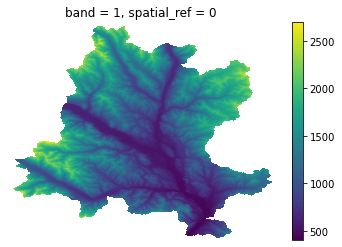

In [19]:
fig, ax = plt.subplots()
methow_dtm.plot(cmap='viridis', ax=ax)
ax.set_axis_off()

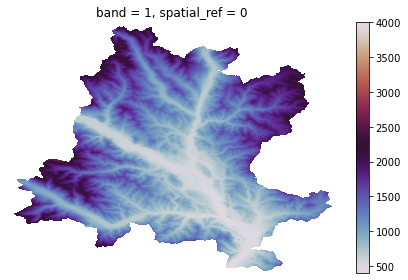

In [45]:
fig, ax = plt.subplots()
methow_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../figures/methow_dtm_scale.jpeg', dpi=300, transparent=True)

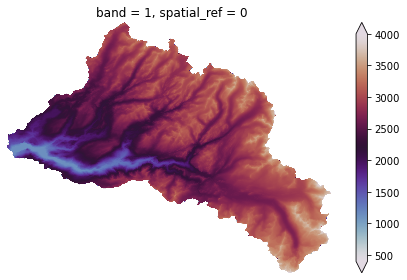

In [44]:
fig, ax = plt.subplots()
tuol_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('../figures/tuol_dtm_scale.jpeg', transparent=True, dpi=300)
#1188 m to 3965 m

In [35]:
tuol_dtm.min()

<xarray.DataArray ()>
array(-376.15466, dtype=float32)
Coordinates:
    band         int64 1
    spatial_ref  int64 0

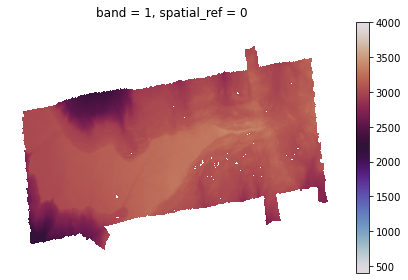

In [47]:
fig, ax = plt.subplots()
gm_dtm.plot(cmap='twilight', ax=ax, vmin=400, vmax=4000)
ax.set_axis_off()
#plt.legend('Elevation (m)')
plt.tight_layout()
plt.savefig('../figures/gm_dtm_scale.jpeg', dpi=300)